***Marcin Ryznar, 405745***

In [22]:
#import bibliotek
import pandas as pd
from matplotlib import pyplot as plt

#link do ścieżki danych
DATA = 'D:\Marcin\STUDIA\Automatyka i Robotyka\Semestr 5\Analiza i bazy danych\Lab. 5\Lab. 5\Analysis Data/'

*Wyświeldanie wszystkich oryginalnych danych*

In [23]:
#df - data frame, dane pobierane z oryginalnego pliku
df_2 = pd.read_csv(f'{DATA}tb_original.csv', sep=';')
#zamieniam wartosci na 0
df = df_2.fillna(0)
print(df_2)

     iso2  year   new_sp  new_sp_m04  new_sp_m514  new_sp_m014  new_sp_m1524  \
0      AD  1989      NaN         NaN          NaN          NaN           NaN   
1      AD  1990      NaN         NaN          NaN          NaN           NaN   
2      AD  1991      NaN         NaN          NaN          NaN           NaN   
3      AD  1992      NaN         NaN          NaN          NaN           NaN   
4      AD  1993     15.0         NaN          NaN          NaN           NaN   
...   ...   ...      ...         ...          ...          ...           ...   
5764   ZW  2004  14581.0         NaN          NaN        187.0         833.0   
5765   ZW  2005  13155.0         NaN          NaN        210.0         837.0   
5766   ZW  2006  12718.0         NaN          NaN        215.0         736.0   
5767   ZW  2007  10583.0         6.0        132.0        138.0         500.0   
5768   ZW  2008   9830.0         NaN          NaN        127.0         614.0   

      new_sp_m2534  new_sp_m3544  new_s

***Zachorowania na gruźlice na przełomie lat według płci***

C:\Users\marci\AppData\Local\Temp/ipykernel_16640/3106206207.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_fm.loc[:, 'female'] = sum_f.sum(numeric_only=True, axis=1)
C:\Users\marci\AppData\Local\Temp/ipykernel_16640/3106206207.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  da_fm.loc[:, 'male'] = sum_m.sum(numeric_only=True, axis=1)


     iso2  year   new_sp  female    male
0      AD  1989      0.0     0.0     0.0
1      AD  1990      0.0     0.0     0.0
2      AD  1991      0.0     0.0     0.0
3      AD  1992      0.0     0.0     0.0
4      AD  1993     15.0     0.0     0.0
...   ...   ...      ...     ...     ...
5764   ZW  2004  14581.0  6735.0  7846.0
5765   ZW  2005  13155.0  6276.0  6879.0
5766   ZW  2006  12718.0  5994.0  6724.0
5767   ZW  2007  10583.0  5091.0  5492.0
5768   ZW  2008   9830.0  4621.0  5209.0

[5769 rows x 5 columns]


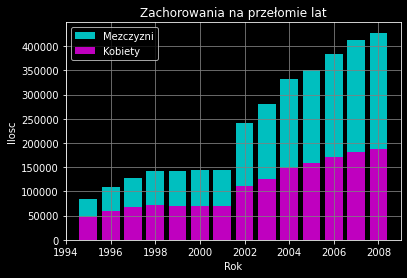

In [30]:
# wybieram jedynie kolumny: nazwy krajów, rok, zachorowania u kobiet i zachorowania u mężczyzn.
da_fm = df[['iso2', 'year', 'new_sp']]
#sumuje kolumny chorych  kobiet  (sp-zachorowanie)
sum_f = df[[ 'new_sp_f014', 'new_sp_f1524', 'new_sp_f2534', 'new_sp_f3544', 'new_sp_f4554', 'new_sp_f5564', 'new_sp_f65', 'new_sp_fu']]
#sumuje kolumny chorych mężczyzn
sum_m = df[[ 'new_sp_m014', 'new_sp_m1524', 'new_sp_m2534', 'new_sp_m3544', 'new_sp_m4554', 'new_sp_m5564', 'new_sp_m65', 'new_sp_mu']]
#dodaje zsumowane kolumny kobiet do tabeli da_fm
da_fm.loc[:, 'female'] = sum_f.sum(numeric_only=True, axis=1)
#dodaje zsumowane kolumny mężczyn do tabeli da_fm
da_fm.loc[:, 'male'] = sum_m.sum(numeric_only=True, axis=1)
#Tabela z danymi
da = da_fm
print(da)


#Tworzenie wykresu
plt.bar(da['year'], da['male'], color = 'c', label = 'Mezczyzni')
plt.bar(da['year'], da['female'], color = 'm', label = 'Kobiety')
plt.title("Zachorowania na przełomie lat")
plt.xlabel("Rok")
plt.ylabel("Ilosc")
plt.xlim([1994,2009])
plt.legend()
plt.grid(color = 'grey')
plt.show()
#zapis do folderu Analysis Data
da.to_csv(path_or_buf=f"{DATA}tb_sum_female_male.csv", sep=";")

Według powyższego wykresu można jasno stwierdzić, iż mężczyźni chorowali na gruźlicę częściej niż kobiety.

***Wybieramy interesujące nas dane. Przeszukujemy dane dla Polski oraz jej sąsiadów w celu późniejszej weryfikacji.***

     iso2  year  new_sp  female    male
4195   PL  1980     0.0     0.0     0.0
4196   PL  1981     0.0     0.0     0.0
4197   PL  1982     0.0     0.0     0.0
4198   PL  1983     0.0     0.0     0.0
4199   PL  1984     0.0     0.0     0.0
4200   PL  1985     0.0     0.0     0.0
4201   PL  1986     0.0     0.0     0.0
4202   PL  1987     0.0     0.0     0.0
4203   PL  1988     0.0     0.0     0.0
4204   PL  1989     0.0     0.0     0.0
4205   PL  1990     0.0     0.0     0.0
4206   PL  1991     0.0     0.0     0.0
4207   PL  1992     0.0     0.0     0.0
4208   PL  1993  7606.0     0.0     0.0
4209   PL  1994  4000.0     0.0     0.0
4210   PL  1995  6955.0  1153.0  2526.0
4211   PL  1996  6819.0  2112.0  4707.0
4212   PL  1997  3497.0   993.0  2493.0
4213   PL  1998  3502.0  1056.0  2446.0
4214   PL  1999  3177.0   928.0  2249.0
4215   PL  2000  3180.0  1142.0  2792.0
4216   PL  2001  3155.0   968.0  2187.0
4217   PL  2002  3060.0   975.0  2085.0
4218   PL  2003  2983.0   909.0  2072.0


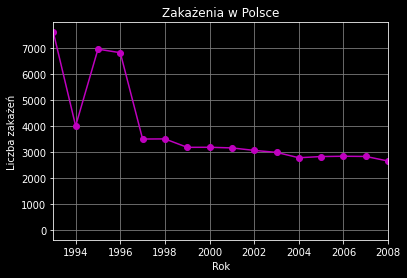

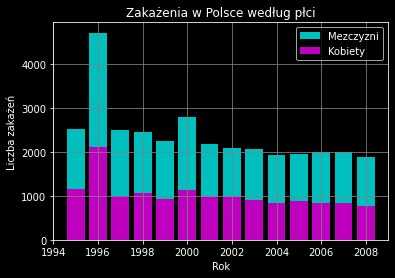

In [38]:
# da - Analysis Date, rezultaty zapisywane do pliku tb_analysis.csv
#szukam danych dla polski
da_chart_pl = da[da['iso2'] == 'PL']

print(da_chart_pl)

#wykres dla Polski
plt.plot(da_chart_pl['year'], da_chart_pl['new_sp'], '-o', color = 'm')
plt.title("Zakażenia w Polsce")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Polsce
plt.bar(da_chart_pl['year'], da_chart_pl['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_pl['year'], da_chart_pl['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Polsce według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()
#zapis do folderu Analysis Data
da_chart_pl.to_csv(path_or_buf=f"{DATA}tb_poland_analysis.csv", sep=";")

*Analiza danych dla Niemiec*

     iso2  year  new_sp  female    male
1324   DE  1980     0.0     0.0     0.0
1325   DE  1981     0.0     0.0     0.0
1326   DE  1982     0.0     0.0     0.0
1327   DE  1983     0.0     0.0     0.0
1328   DE  1984     0.0     0.0     0.0
1329   DE  1985     0.0     0.0     0.0
1330   DE  1986     0.0     0.0     0.0
1331   DE  1987     0.0     0.0     0.0
1332   DE  1988     0.0     0.0     0.0
1333   DE  1989     0.0     0.0     0.0
1334   DE  1990     0.0     0.0     0.0
1335   DE  1991     0.0     0.0     0.0
1336   DE  1992     0.0     0.0     0.0
1337   DE  1993  4730.0     0.0     0.0
1338   DE  1994  4177.0     0.0     0.0
1339   DE  1995  3852.0  1140.0  2712.0
1340   DE  1996  3689.0  1157.0  2523.0
1341   DE  1997  3346.0  1018.0  2328.0
1342   DE  1998  3124.0   910.0  2214.0
1343   DE  1999  2918.0   887.0  2031.0
1344   DE  2000     0.0     0.0     0.0
1345   DE  2001  1935.0   291.0   550.0
1346   DE  2002  1868.0   238.0   484.0
1347   DE  2003  1679.0   420.0   775.0


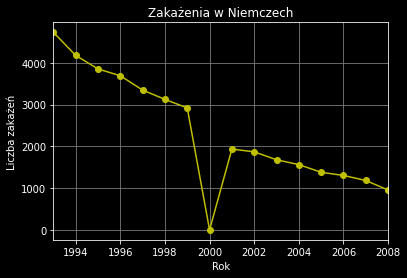

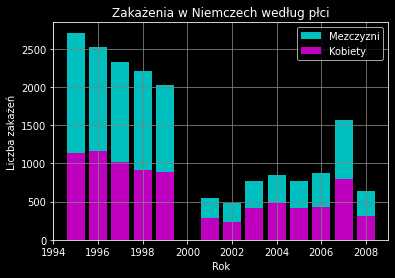

In [40]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Niemiec
da_chart_de = da[da['iso2'] == 'DE']
print(da_chart_de)

#wykres dla Niemiec
plt.plot(da_chart_de['year'], da_chart_de['new_sp'], '-o', color = 'y')
plt.title("Zakażenia w Niemczech")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Niemczech
plt.bar(da_chart_de['year'], da_chart_de['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_de['year'], da_chart_de['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Niemczech według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()
#zapis do folderu Analysis Data
da_chart_de.to_csv(path_or_buf=f"{DATA}tb_germany_analysis.csv", sep=";")

*Analiza danych dla Rosji*

     iso2  year   new_sp  female     male
4423   RU  1980      0.0     0.0      0.0
4424   RU  1981      0.0     0.0      0.0
4425   RU  1982      0.0     0.0      0.0
4426   RU  1983      0.0     0.0      0.0
4427   RU  1984      0.0     0.0      0.0
4428   RU  1985      0.0     0.0      0.0
4429   RU  1986      0.0     0.0      0.0
4430   RU  1987      0.0     0.0      0.0
4431   RU  1988      0.0     0.0      0.0
4432   RU  1989      0.0     0.0      0.0
4433   RU  1990      0.0     0.0      0.0
4434   RU  1991      0.0     0.0      0.0
4435   RU  1992      0.0     0.0      0.0
4436   RU  1993      0.0     0.0      0.0
4437   RU  1994  30389.0     0.0      0.0
4438   RU  1995  37512.0     0.0      0.0
4439   RU  1996  42534.0    48.0    235.0
4440   RU  1997  42094.0   142.0    518.0
4441   RU  1998  42219.0   142.0    541.0
4442   RU  1999  21744.0  4225.0  17519.0
4443   RU  2000  27467.0   304.0   2025.0
4444   RU  2001  26605.0  5825.0  20781.0
4445   RU  2002  27865.0  6292.0  

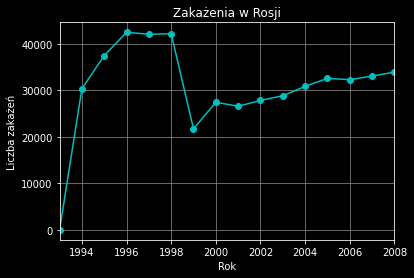

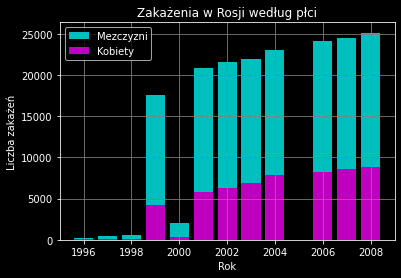

In [43]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Rosji
da_chart_ru = da[da['iso2'] == 'RU']
print(da_chart_ru)

#wykres dla Rosji
plt.plot(da_chart_ru['year'], da_chart_ru['new_sp'], '-o',color = 'c')
plt.title("Zakażenia w Rosji")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Rosji
plt.bar(da_chart_ru['year'], da_chart_ru['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_ru['year'], da_chart_ru['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Rosji według płci")
plt.xlabel("Rok")
plt.xlim([1995,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_ru.to_csv(path_or_buf=f"{DATA}tb_russia_analysis.csv", sep=";")

*Analiza danych dla Białorusi*

    iso2  year  new_sp  female   male
813   BY  1980     0.0     0.0    0.0
814   BY  1981     0.0     0.0    0.0
815   BY  1982     0.0     0.0    0.0
816   BY  1983     0.0     0.0    0.0
817   BY  1984     0.0     0.0    0.0
818   BY  1985     0.0     0.0    0.0
819   BY  1986     0.0     0.0    0.0
820   BY  1987     0.0     0.0    0.0
821   BY  1988     0.0     0.0    0.0
822   BY  1989     0.0     0.0    0.0
823   BY  1990     0.0     0.0    0.0
824   BY  1991     0.0     0.0    0.0
825   BY  1992     0.0     0.0    0.0
826   BY  1993  1493.0     0.0    0.0
827   BY  1994  1775.0     0.0    0.0
828   BY  1995  1845.0     0.0    0.0
829   BY  1996  2117.0     0.0    0.0
830   BY  1997  2273.0     0.0    0.0
831   BY  1998  5047.0     0.0    0.0
832   BY  1999  2769.0     0.0    0.0
833   BY  2000  2547.0     0.0    0.0
834   BY  2001  2341.0     4.0    2.0
835   BY  2002     0.0   137.0  701.0
836   BY  2003  1018.0   192.0  826.0
837   BY  2004  1109.0   221.0  888.0
838   BY  20

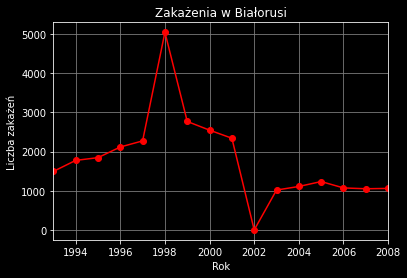

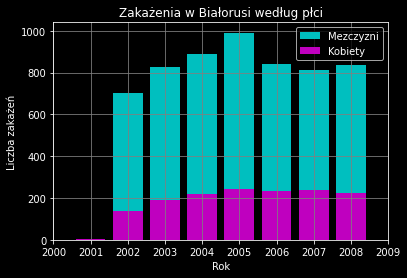

In [72]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Białorusi
da_chart_by = da[da['iso2'] == 'BY']
print(da_chart_by)

#wykres dla Białorusi
plt.plot(da_chart_by['year'], da_chart_by['new_sp'], '-o',color = 'r')
plt.title("Zakażenia w Białorusi")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Białorusi
plt.bar(da_chart_by['year'], da_chart_by['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_by['year'], da_chart_by['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Białorusi według płci")
plt.xlabel("Rok")
plt.xlim([2000,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_by.to_csv(path_or_buf=f"{DATA}tb_belarus_analysis.csv", sep=";")

*Analiza danych dla Ukrainy*

     iso2  year   new_sp  female     male
5299   UA  1980      0.0     0.0      0.0
5300   UA  1981      0.0     0.0      0.0
5301   UA  1982      0.0     0.0      0.0
5302   UA  1983      0.0     0.0      0.0
5303   UA  1984      0.0     0.0      0.0
5304   UA  1985      0.0     0.0      0.0
5305   UA  1986      0.0     0.0      0.0
5306   UA  1987      0.0     0.0      0.0
5307   UA  1988      0.0     0.0      0.0
5308   UA  1989      0.0     0.0      0.0
5309   UA  1990      0.0     0.0      0.0
5310   UA  1991      0.0     0.0      0.0
5311   UA  1992      0.0     0.0      0.0
5312   UA  1993   8314.0     0.0      0.0
5313   UA  1994   8471.0     0.0      0.0
5314   UA  1995   8263.0  1689.0   6574.0
5315   UA  1996   7827.0  1957.0   7607.0
5316   UA  1997   9533.0  1997.0   7466.0
5317   UA  1998  10586.0  2326.0   8260.0
5318   UA  1999  10412.0  2477.0   7935.0
5319   UA  2000  10738.0  2486.0   8252.0
5320   UA  2001      0.0  2743.0   9209.0
5321   UA  2002      0.0     0.0  

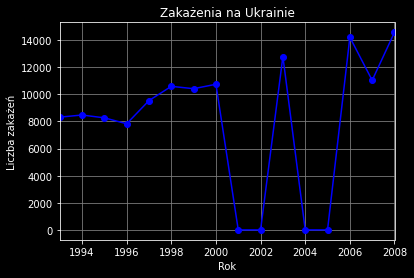

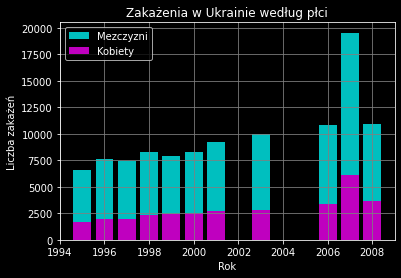

In [71]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Ukrainy
da_chart_ua = da[da['iso2'] == 'UA']
print(da_chart_ua)

#wykres dla Ukrainy
plt.plot(da_chart_ua['year'], da_chart_ua['new_sp'], '-o', color = 'b')
plt.title("Zakażenia na Ukrainie")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Ukrainie
plt.bar(da_chart_ua['year'], da_chart_ua['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_ua['year'], da_chart_ua['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Ukrainie według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_ua.to_csv(path_or_buf=f"{DATA}tb_ukraine_analysis.csv", sep=";")

*Analiza danych dla Czech*

     iso2  year  new_sp  female   male
1295   CZ  1980     0.0     0.0    0.0
1296   CZ  1981     0.0     0.0    0.0
1297   CZ  1982     0.0     0.0    0.0
1298   CZ  1983     0.0     0.0    0.0
1299   CZ  1984     0.0     0.0    0.0
1300   CZ  1985     0.0     0.0    0.0
1301   CZ  1986     0.0     0.0    0.0
1302   CZ  1987     0.0     0.0    0.0
1303   CZ  1988     0.0     0.0    0.0
1304   CZ  1989     0.0     0.0    0.0
1305   CZ  1990     0.0     0.0    0.0
1306   CZ  1991     0.0     0.0    0.0
1307   CZ  1992     0.0     0.0    0.0
1308   CZ  1993   548.0     0.0    0.0
1309   CZ  1994   524.0     0.0    0.0
1310   CZ  1995   487.0   160.0  348.0
1311   CZ  1996   586.0   169.0  405.0
1312   CZ  1997   481.0   139.0  342.0
1313   CZ  1998   545.0   147.0  398.0
1314   CZ  1999   449.0   127.0  322.0
1315   CZ  2000   420.0   111.0  299.0
1316   CZ  2001   391.0   109.0  282.0
1317   CZ  2002   329.0    81.0  248.0
1318   CZ  2003   338.0    92.0  246.0
1319   CZ  2004   302.0  

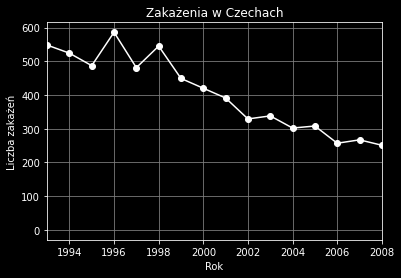

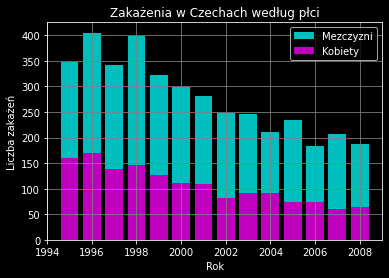

In [48]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Czech
da_chart_cz = da[da['iso2'] == 'CZ']
print(da_chart_cz)

#wykres dla Czech
plt.plot(da_chart_cz['year'], da_chart_cz['new_sp'], '-o',color = 'w')
plt.title("Zakażenia w Czechach")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Czechach
plt.bar(da_chart_cz['year'], da_chart_cz['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_cz['year'], da_chart_cz['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Czechach według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_cz.to_csv(path_or_buf=f"{DATA}tb_czech_analysis.csv", sep=";")


*Analiza danych dla Słowacji*

     iso2  year  new_sp  female   male
4674   SK  1980     0.0     0.0    0.0
4675   SK  1981     0.0     0.0    0.0
4676   SK  1982     0.0     0.0    0.0
4677   SK  1983     0.0     0.0    0.0
4678   SK  1984     0.0     0.0    0.0
4679   SK  1985     0.0     0.0    0.0
4680   SK  1986     0.0     0.0    0.0
4681   SK  1987     0.0     0.0    0.0
4682   SK  1988     0.0     0.0    0.0
4683   SK  1989     0.0     0.0    0.0
4684   SK  1990     0.0     0.0    0.0
4685   SK  1991     0.0     0.0    0.0
4686   SK  1992     0.0     0.0    0.0
4687   SK  1993   882.0     0.0    0.0
4688   SK  1994   409.0     0.0    0.0
4689   SK  1995   788.0   276.0  512.0
4690   SK  1996   760.0   316.0  424.0
4691   SK  1997   283.0    93.0  190.0
4692   SK  1998   303.0    93.0  210.0
4693   SK  1999   246.0    83.0  163.0
4694   SK  2000   236.0    84.0  152.0
4695   SK  2001   226.0    79.0  147.0
4696   SK  2002   202.0    56.0  144.0
4697   SK  2003   200.0    73.0  126.0
4698   SK  2004   157.0  

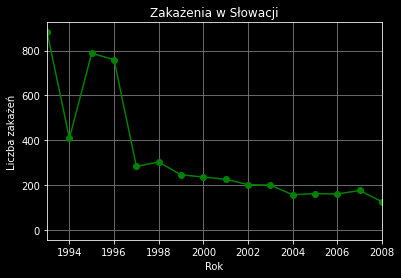

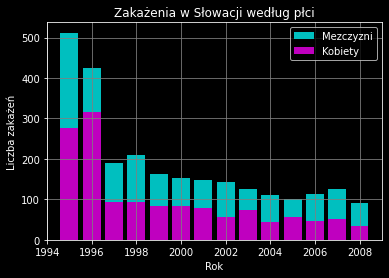

In [49]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Słowacji
da_chart_sk = da[da['iso2'] == 'SK']
print(da_chart_sk)

#wykres dla Słowacji
plt.plot(da_chart_sk['year'], da_chart_sk['new_sp'], '-o',color = 'g')
plt.title("Zakażenia w Słowacji")
plt.xlabel("Rok")
plt.xlim([1993,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Słowacji
plt.bar(da_chart_sk['year'], da_chart_sk['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_sk['year'], da_chart_sk['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Słowacji według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_sk.to_csv(path_or_buf=f"{DATA}tb_slovakia_analysis.csv", sep=";")

*Analiza danych dla Litwy*

     iso2  year  new_sp  female   male
3024   LT  1980     0.0     0.0    0.0
3025   LT  1981     0.0     0.0    0.0
3026   LT  1982     0.0     0.0    0.0
3027   LT  1983     0.0     0.0    0.0
3028   LT  1984     0.0     0.0    0.0
3029   LT  1985     0.0     0.0    0.0
3030   LT  1986     0.0     0.0    0.0
3031   LT  1987     0.0     0.0    0.0
3032   LT  1988     0.0     0.0    0.0
3033   LT  1989     0.0     0.0    0.0
3034   LT  1990     0.0     0.0    0.0
3035   LT  1991     0.0     0.0    0.0
3036   LT  1992     0.0     0.0    0.0
3037   LT  1993   688.0     0.0    0.0
3038   LT  1994     0.0     0.0    0.0
3039   LT  1995   979.0   199.0  750.0
3040   LT  1996  1121.0   291.0  840.0
3041   LT  1997  1200.0   325.0  875.0
3042   LT  1998   787.0   206.0  581.0
3043   LT  1999   787.0   220.0  465.0
3044   LT  2000   776.0   198.0  578.0
3045   LT  2001   935.0   272.0  663.0
3046   LT  2002   822.0   236.0  585.0
3047   LT  2003   912.0   229.0  668.0
3048   LT  2004   863.0  

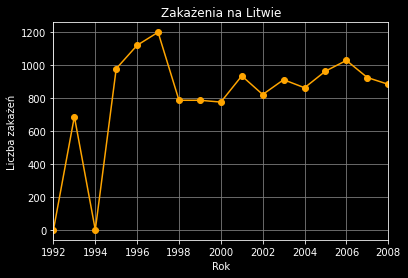

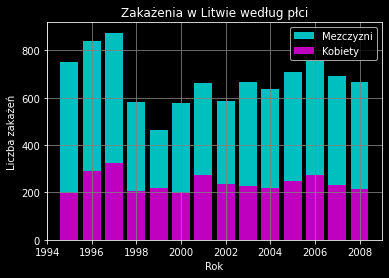

In [50]:
# wybieram jedynie kolumny: nazwy krajów, rok i dodatnie zakażenia u kobiet i mężczyzn

#szukam danych dla Litwy
da_chart_lt = da[da['iso2'] == 'LT']
print(da_chart_lt)

#wykres dla Litwy
plt.plot(da_chart_lt['year'], da_chart_lt['new_sp'], '-o', color = 'orange')
plt.title("Zakażenia na Litwie")
plt.xlabel("Rok")
plt.xlim([1992,2008])
plt.ylabel("Liczba zakażeń")
plt.grid(color = 'grey')
plt.show()

#wykres zachorowań wśród kobiet i mezczyzn w Litwie
plt.bar(da_chart_lt['year'], da_chart_lt['male'], color = 'c', label='Mezczyzni')
plt.bar(da_chart_lt['year'], da_chart_lt['female'], color = 'm', label='Kobiety')
plt.title("Zakażenia w Litwie według płci")
plt.xlabel("Rok")
plt.xlim([1994,2009])
plt.ylabel("Liczba zakażeń")
plt.legend()
plt.grid(color = 'grey')
plt.show()

#zapis do folderu Analysis Data
da_chart_lt.to_csv(path_or_buf=f"{DATA}tb_lithuania_analysis.csv", sep=";")

***Porównanie wyników, przedstawione na jednym wykresie***

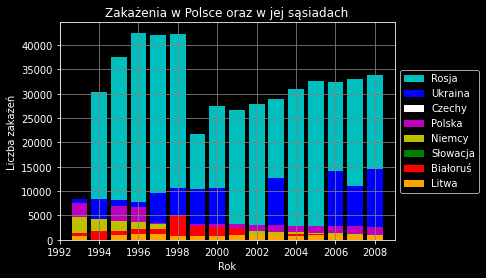

In [69]:
plt.bar(da_chart_ru['year'], da_chart_ru['new_sp'], color = 'c', label = 'Rosja')
plt.bar(da_chart_ua['year'], da_chart_ua['new_sp'], color = 'b', label = 'Ukraina')
plt.bar(da_chart_cz['year'], da_chart_cz['new_sp'], color = 'w', label = 'Czechy')
plt.bar(da_chart_pl['year'], da_chart_pl['new_sp'], color = 'm', label = 'Polska')
plt.bar(da_chart_de['year'], da_chart_de['new_sp'], color = 'y', label = 'Niemcy')
plt.bar(da_chart_sk['year'], da_chart_sk['new_sp'], color = 'g', label = 'Słowacja')
plt.bar(da_chart_by['year'], da_chart_by['new_sp'], color = 'r', label = 'Białoruś')
plt.bar(da_chart_lt['year'], da_chart_lt['new_sp'], color = 'orange', label = 'Litwa')
plt.title("Zakażenia w Polsce oraz w jej sąsiadach")
plt.xlabel("Rok")
plt.ylabel("Liczba zakażeń")
plt.xlim([1992,2009])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(color = 'grey')
plt.show()


Najwięcej zakażeń odnotowana w Rosji
